<center>
  <h1><b>Twitter and Reddit Sentimental analysis</b></h1>
</center>

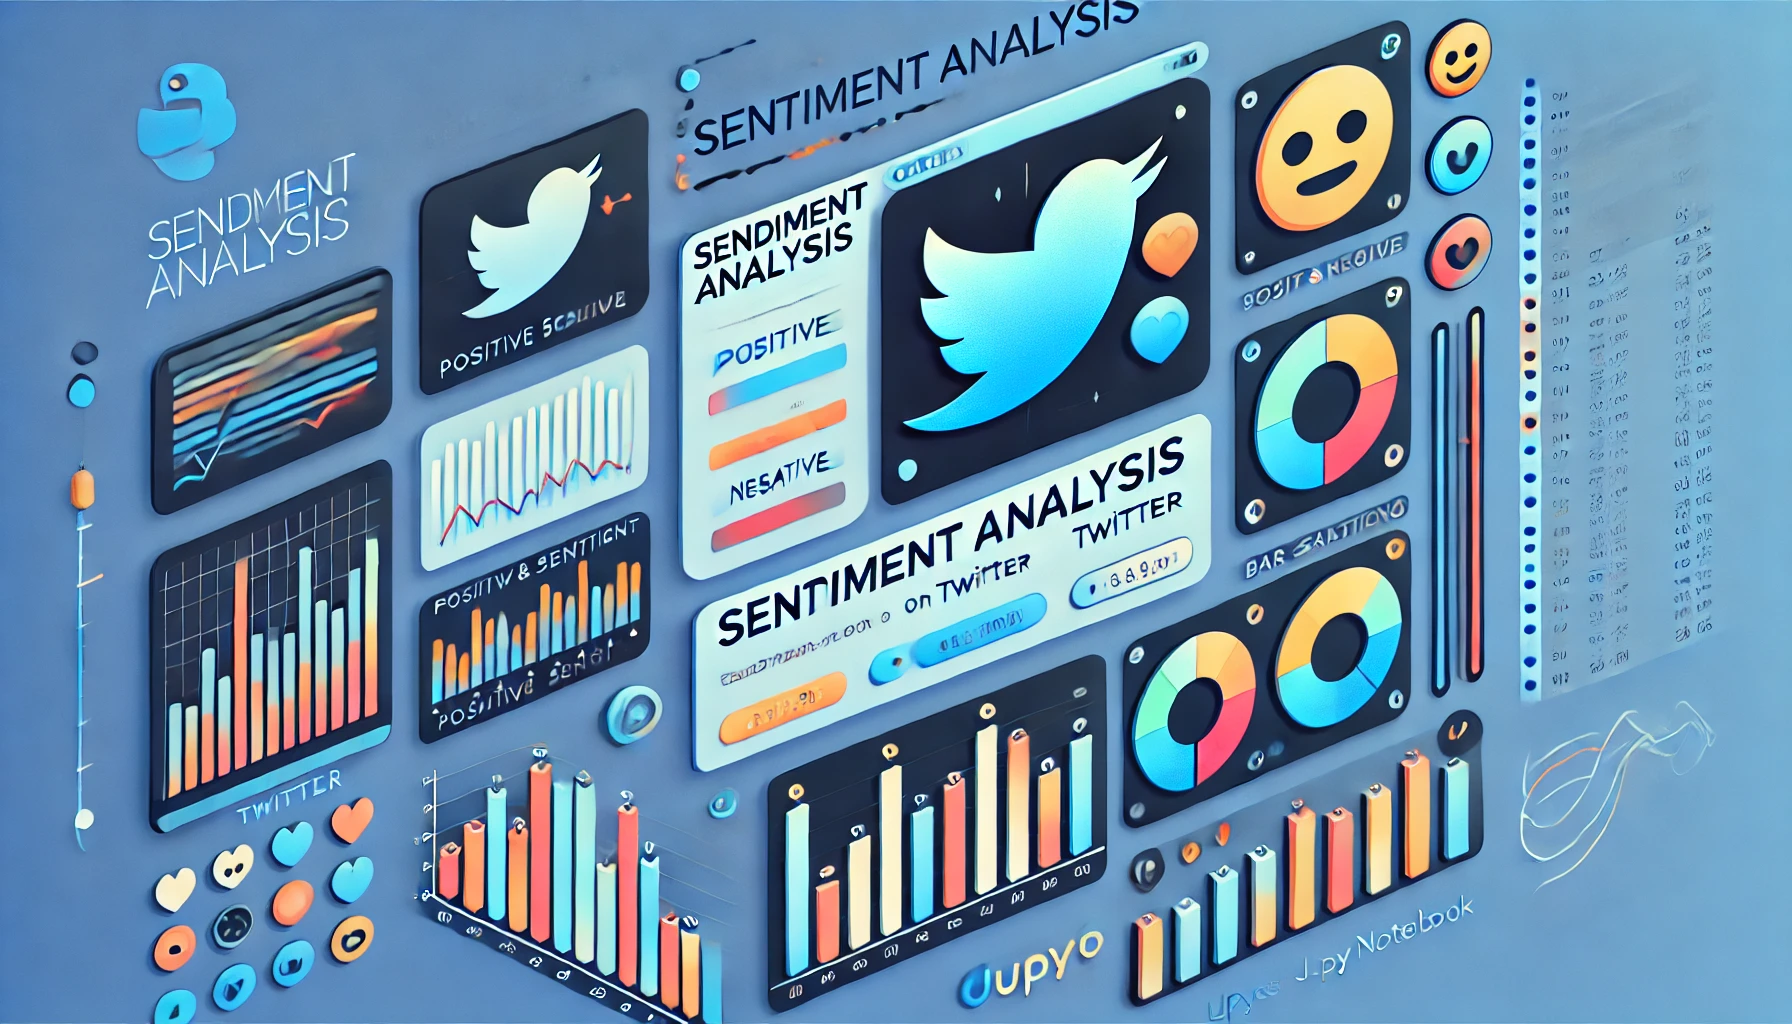

# **Project Description:**
This project focuses on Sentiment Analysis using text data collected from two popular platforms: Twitter and Reddit. The objective is to analyze the sentiment (positive, negative, or neutral) expressed in tweets and Reddit posts, providing a comprehensive understanding of public opinions across diverse topics.

Sentiment Analysis involves the use of Natural Language Processing (NLP) and Machine Learning techniques to classify emotions conveyed in text.

# **Project Goals:**
Develop a unified sentiment analysis model capable of handling text from multiple platforms.

**Study sentiment differences between the two platforms:**

**Twitter:** Short and concise text.

**Reddit:** Longer, more detailed discussions across various communities.

Understand public opinions on specific topics, such as current events, products, or social issues.
Create a structured dataset suitable for training machine learning models and performing text analysis.

# **Project Steps:**
**1. Data Collection:**
Use APIs to collect tweets from Twitter and posts from specific Subreddits.
Focus on trending topics to ensure diverse data coverage.

**2. Data Cleaning:**
Remove duplicates, unnecessary symbols (like unrelated emojis), and links.
Process spelling corrections and standardize abbreviations.

**3. Text Analysis:**
Classify text into positive, negative, or neutral sentiments using methods like:
Naive Bayes Classifier.
LSTM or BERT for handling complex textual structures.

**4. Model Development:**
Train machine learning models on the dataset using libraries such as Scikit-learn or TensorFlow.
Optimize the model using cross-validation techniques.

**5. Results Visualization:**
Create visual representations (e.g., bar charts, pie charts) showing overall sentiment distributions.
Compare sentiment trends between Twitter and Reddit.
Highlight topics eliciting strong emotional responses (positive or negative).

# **Project Deliverables:**
1.A labeled dataset of tweets and Reddit posts with sentiment classifications.

2.A robust sentiment analysis model with high accuracy.

3.Visualized insights through graphs and dashboards comparing sentiment trends between platforms

# **Import libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading Dataset**

In [3]:
df1 = pd.read_csv('/content/Reddit_Data.csv')
df2 = pd.read_csv('/content/Twitter_Data.csv')

# **Exploratory Data**

In [4]:
df1

clean_comment  category
0      family mormon have never tried explain them t...       1.0
1     buddhism has very much lot compatible with chr...       1.0
2     seriously don say thing first all they won get...      -1.0
3     what you have learned yours and only yours wha...       0.0
4     for your own benefit you may want read living ...       1.0
...                                                 ...       ...
5327  according his affidavit modi has done his from...       0.0
5328  why isn other media reporting this janta repor...       1.0
5329  does even have secondary school certificate st...       1.0
5330  pappu matric fail tha uska pass certificate li...      -1.0
5331            title misleading fuck the activist neve       NaN

[5332 rows x 2 columns]

from matplotlib import pyplot as plt
df1['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
df2

clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]

from matplotlib import pyplot as plt
df2['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df2['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clean_comment  5322 non-null   object 
 1   category       5331 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.4+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [8]:
#renaming the columns
df2.columns=['messages','labels']
df1.columns=['messages','labels']

In [9]:
df2.head()

messages  labels
0  when modi promised “minimum government maximum...    -1.0
1  talk all the nonsense and continue all the dra...     0.0
2  what did just say vote for modi  welcome bjp t...     1.0
3  asking his supporters prefix chowkidar their n...     1.0
4  answer who among these the most powerful world...     1.0

from matplotlib import pyplot as plt
_df_0['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('messages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['labels']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'labels'}, axis=1)
              .sort_values('labels', ascending=True))
  xs = counted['labels']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('labels', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('messages')):
  _plot_series(series, series_name, i)
  fig.legend(title='messages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('labels')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['messages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='labels', y='messages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
df1.head()

messages  labels
0   family mormon have never tried explain them t...     1.0
1  buddhism has very much lot compatible with chr...     1.0
2  seriously don say thing first all they won get...    -1.0
3  what you have learned yours and only yours wha...     0.0
4  for your own benefit you may want read living ...     1.0

from matplotlib import pyplot as plt
_df_5['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('messages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['messages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='labels', y='messages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Merge Data**


In [11]:
data = pd.concat([df1, df2], ignore_index = True)

In [12]:
data

messages  labels
0        family mormon have never tried explain them t...     1.0
1       buddhism has very much lot compatible with chr...     1.0
2       seriously don say thing first all they won get...    -1.0
3       what you have learned yours and only yours wha...     0.0
4       for your own benefit you may want read living ...     1.0
...                                                   ...     ...
168307  why these 456 crores paid neerav modi not reco...    -1.0
168308  dear rss terrorist payal gawar what about modi...    -1.0
168309  did you cover her interaction forum where she ...     0.0
168310  there big project came into india modi dream p...     0.0
168311  have you ever listen about like gurukul where ...     1.0

[168312 rows x 2 columns]

from matplotlib import pyplot as plt
data['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
data.tail()

messages  labels
168307  why these 456 crores paid neerav modi not reco...    -1.0
168308  dear rss terrorist payal gawar what about modi...    -1.0
168309  did you cover her interaction forum where she ...     0.0
168310  there big project came into india modi dream p...     0.0
168311  have you ever listen about like gurukul where ...     1.0

from matplotlib import pyplot as plt
_df_9['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('messages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['labels']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'labels'}, axis=1)
              .sort_values('labels', ascending=True))
  xs = counted['labels']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('labels', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('messages')):
  _plot_series(series, series_name, i)
  fig.legend(title='messages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('labels')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['messages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='labels', y='messages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168312 entries, 0 to 168311
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   messages  168298 non-null  object 
 1   labels    168304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.6+ MB


# **Handling Missing Values**

In [15]:
data.isnull().sum()

messages    14
labels       8
dtype: int64

In [16]:
data = data.dropna()

In [17]:
data.head()

messages  labels
0   family mormon have never tried explain them t...     1.0
1  buddhism has very much lot compatible with chr...     1.0
2  seriously don say thing first all they won get...    -1.0
3  what you have learned yours and only yours wha...     0.0
4  for your own benefit you may want read living ...     1.0

from matplotlib import pyplot as plt
_df_14['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('messages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['messages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='labels', y='messages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [18]:
data.tail()

messages  labels
168307  why these 456 crores paid neerav modi not reco...    -1.0
168308  dear rss terrorist payal gawar what about modi...    -1.0
168309  did you cover her interaction forum where she ...     0.0
168310  there big project came into india modi dream p...     0.0
168311  have you ever listen about like gurukul where ...     1.0

from matplotlib import pyplot as plt
_df_18['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('messages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['labels']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'labels'}, axis=1)
              .sort_values('labels', ascending=True))
  xs = counted['labels']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('labels', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('messages')):
  _plot_series(series, series_name, i)
  fig.legend(title='messages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('labels')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_21['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['messages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='labels', y='messages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Data Preprocessing**

In [19]:
!pip install --upgrade tensorflow numpy

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you have scipy 1.7.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
jax 0.4.33

In [20]:
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [21]:
#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

In [22]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
    text=lemmatization(text)
    return text

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])
import nltk
nltk.data.path.append('/root/nltk_data')
import nltk
nltk.download('all')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_ta

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package city_database to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package city_database is already up

True

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatization(text):
    lm = WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

data['messages1'] = data['messages'].apply(clean_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-24-fa2ab54e9cf4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages1'] = data['messages'].apply(clean_text)


In [25]:
data['messages1']

0         family mormon never try explain still stare pu...
1         buddhism much lot compatible christianity espe...
2         seriously say thing first get complex explain ...
3         learn want teach different focus goal wrap pap...
4         benefit may want read live buddha live christ ...
                                ...                        
168307    crores pay neerav modi recover congress leader...
168308    dear rss terrorist payal gawar modi kill plus ...
168309                        cover interaction forum leave
168310    big project come india modi dream project happ...
168311    ever listen like gurukul discipline maintain e...
Name: messages1, Length: 168290, dtype: object

# **Sentiment Analysis**

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Extract compound score, which represents overall sentiment
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply sentiment analysis to the cleaned text data
data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)

<ipython-input-27-28a27091f096>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168290 entries, 0 to 168311
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   messages         168290 non-null  object 
 1   labels           168290 non-null  float64
 2   messages1        168290 non-null  object 
 3   sentiment_score  168290 non-null  float64
dtypes: float64(2), object(2)
memory usage: 6.4+ MB


In [29]:
data.drop('messages', axis=1, inplace=True)

<ipython-input-29-27544148e1fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('messages', axis=1, inplace=True)


In [30]:
data.head()

labels                                          messages1  sentiment_score
0     1.0  family mormon never try explain still stare pu...           0.9423
1     1.0  buddhism much lot compatible christianity espe...           0.9831
2    -1.0  seriously say thing first get complex explain ...           0.7430
3     0.0  learn want teach different focus goal wrap pap...           0.0772
4     1.0  benefit may want read live buddha live christ ...           0.9393

from matplotlib import pyplot as plt
_df_23['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('messages1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='labels', y='sentiment_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['labels'].plot(kind='line', figsize=(8, 4), title='labels')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['messages1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='labels', y='messages1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['messages1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='sentiment_score', y='messages1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **EDA & Data Visualisation**

<Axes: xlabel='labels'>

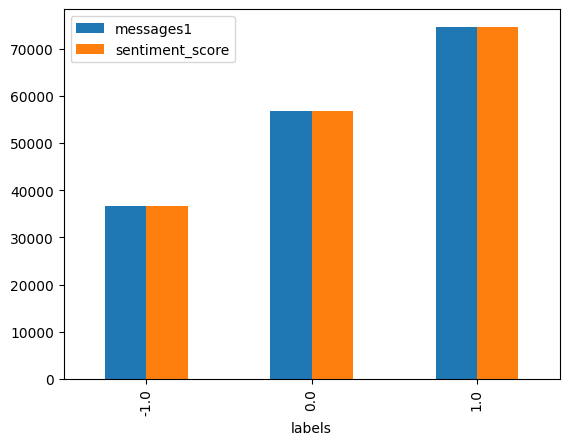

In [31]:
 #The distribution of sentiments
data.groupby('labels').count().plot(kind='bar')

In [32]:
data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

<ipython-input-32-95b0dc3750cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})


<ipython-input-33-8e689c2e3494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)


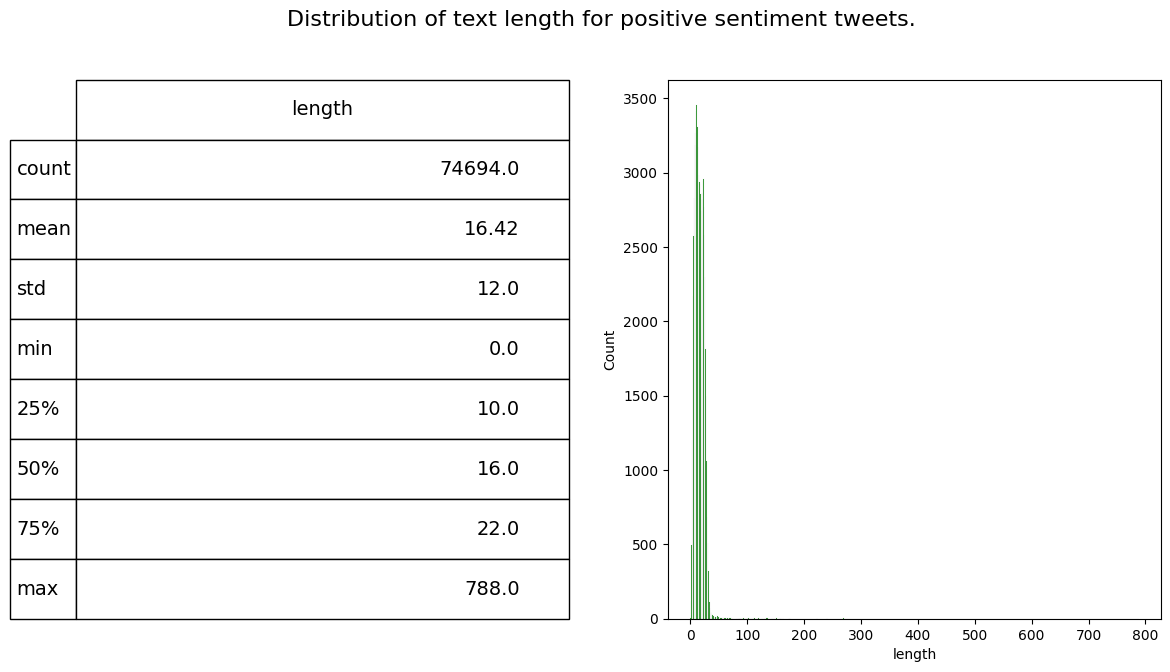

In [33]:
#Plotting the distribution of text length for positive sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

<ipython-input-34-69b0d5e43d45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)
<ipython-input-34-69b0d5e43d45>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])


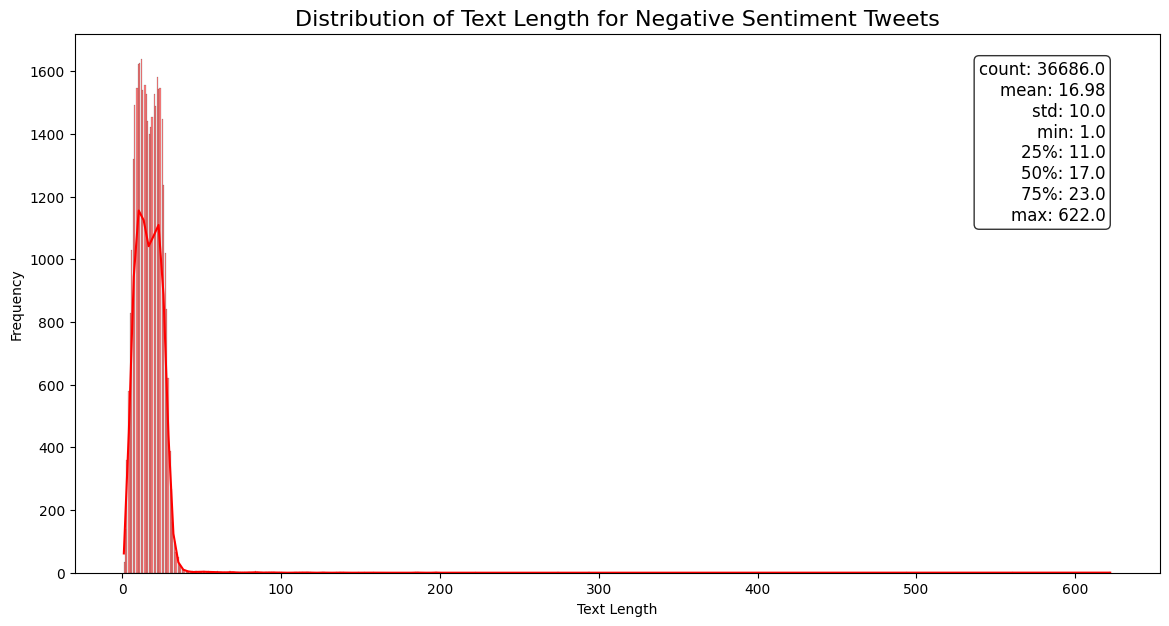

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

data['length'] = data.messages1.str.split().apply(len)
sns.histplot(data[data['label'] == 'Negative']['length'], ax=ax, color='red', kde=True)

describe = data.length[data.label == 'Negative'].describe().to_frame().round(2)
stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(
    0.95, 0.95, stats_text,
    transform=ax.transAxes,
    fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props
)

ax.set_title('Distribution of Text Length for Negative Sentiment Tweets', fontsize=16)
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()


<ipython-input-35-f54f05be22b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)
<ipython-input-35-f54f05be22b3>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])


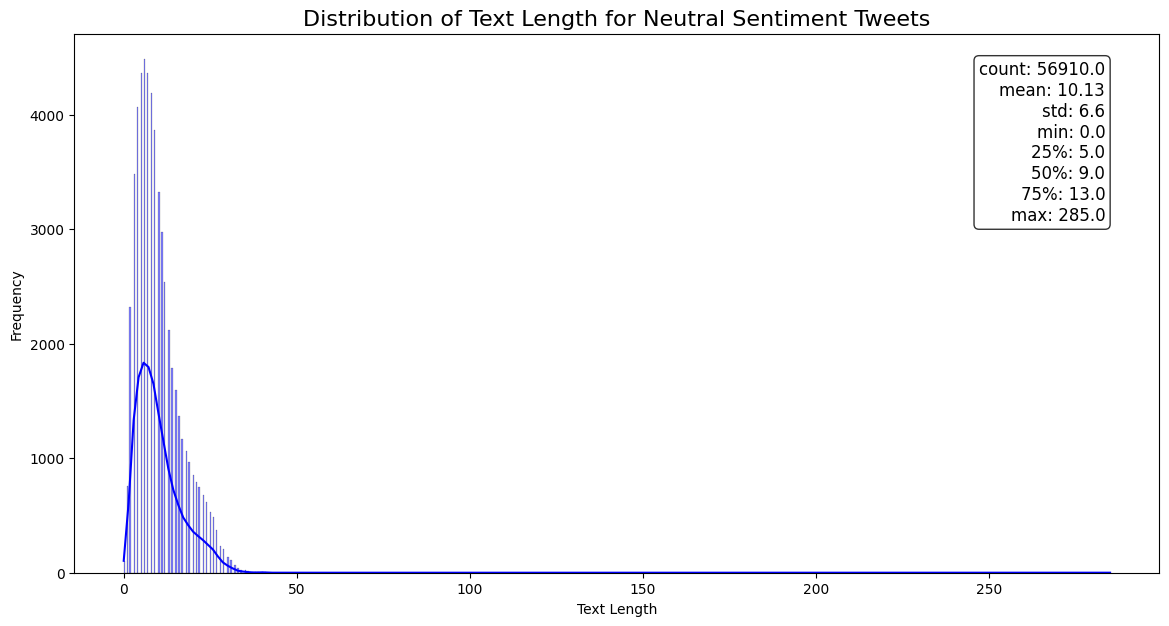

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

data['length'] = data.messages1.str.split().apply(len)
sns.histplot(data[data['label'] == 'Neutral']['length'], ax=ax, color='blue', kde=True)

describe = data.length[data.label == 'Neutral'].describe().to_frame().round(2)
stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(
    0.95, 0.95, stats_text,
    transform=ax.transAxes,
    fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props
)

ax.set_title('Distribution of Text Length for Neutral Sentiment Tweets', fontsize=16)
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()


In [36]:
import plotly.express as px
fig = px.pie(data, names='label', title ='Pie chart of different sentiments of data')
fig.show()

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168290 entries, 0 to 168311
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           168290 non-null  float64
 1   messages1        168290 non-null  object 
 2   sentiment_score  168290 non-null  float64
 3   label            168290 non-null  object 
 4   length           168290 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ MB


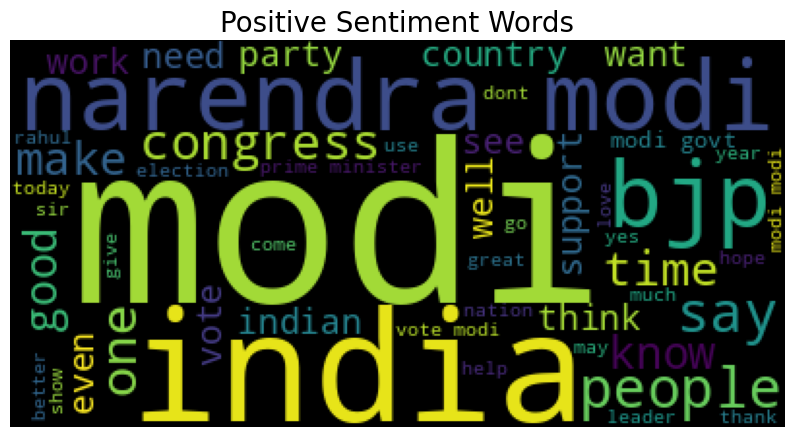

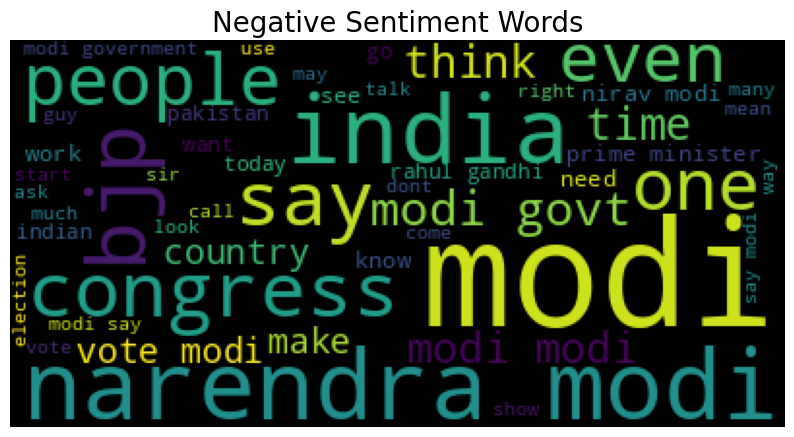

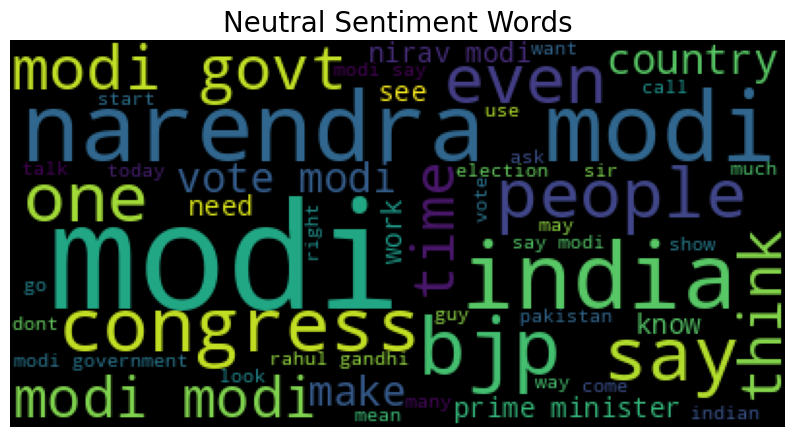

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcount_gen(df, category, sentiment_column='sentiment_score'):
              """
              Generating Word Cloud

              Inputs:
                - df: DataFrame containing the data
                - category: Positive/Negative/Neutral
                - sentiment_column (optional): Name of the column containing sentiment score (default: 'sentiment_score')
              """

              # Filter data based on sentiment
              filtered_data = df[df[sentiment_column] > 0.5] if category == 'Positive' else df[df[sentiment_column] <= 0.5]

              # Combine all messages from the filtered data
              combined_tweets = " ".join(filtered_data['messages1'])

              # Initialize wordcloud object
              wc = WordCloud(background_color='black',
                              max_words=50,
                              stopwords=STOPWORDS)

              # Generate and plot wordcloud
              plt.figure(figsize=(10, 10))
              plt.imshow(wc.generate(combined_tweets))
              plt.title('{} Sentiment Words'.format(category), fontsize=20)
              plt.axis('off')
              plt.show()
#Positive tweet words
wordcount_gen(data, 'Positive')

# Negative tweet words
wordcount_gen(data, 'Negative')

# Neutral tweet words (assuming sentiment_column < 0.5 is neutral)
wordcount_gen(data, 'Neutral')

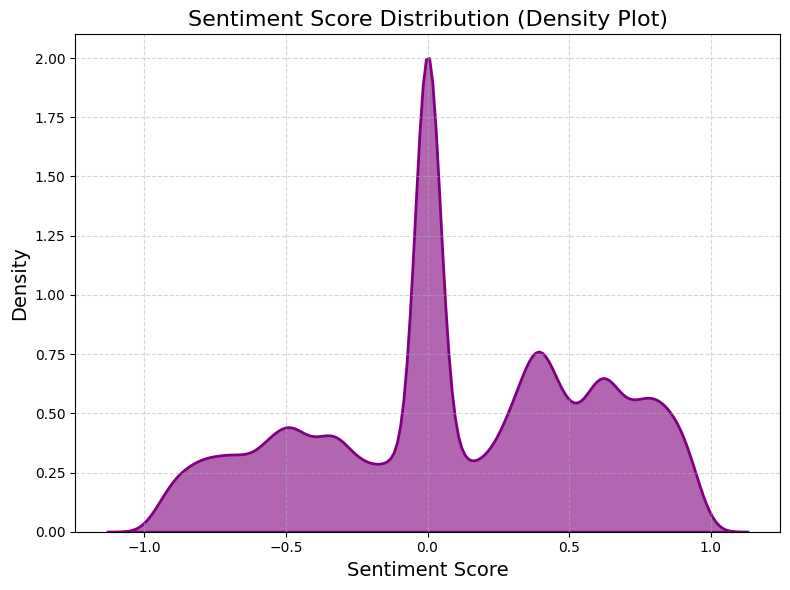

In [39]:
# Visualize sentiment distribution using a density plot
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data['sentiment_score'],
    fill=True,
    color='purple',
    alpha=0.6,
    linewidth=2
)

plt.title('Sentiment Score Distribution (Density Plot)', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


<ipython-input-40-f76c39074626>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




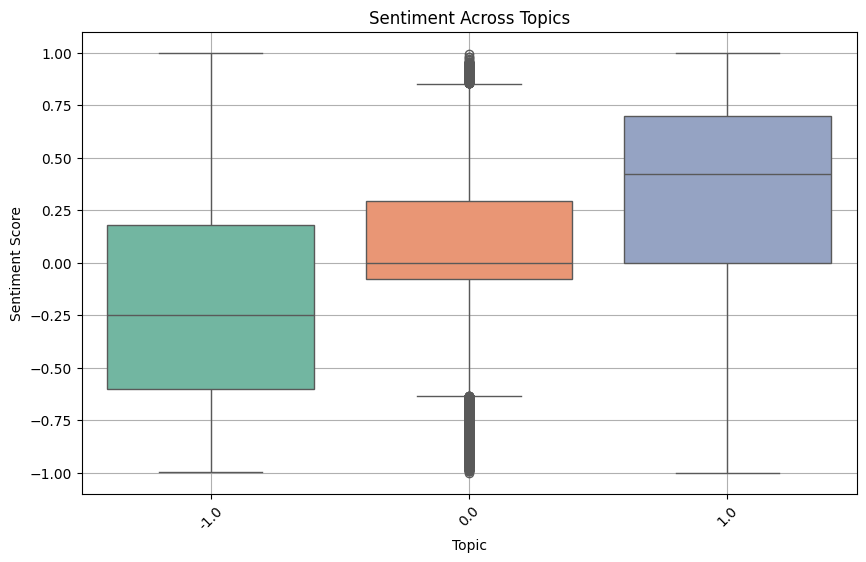

In [40]:
# Compare sentiment across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='sentiment_score', data=data, palette='Set2')
plt.title('Sentiment Across Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

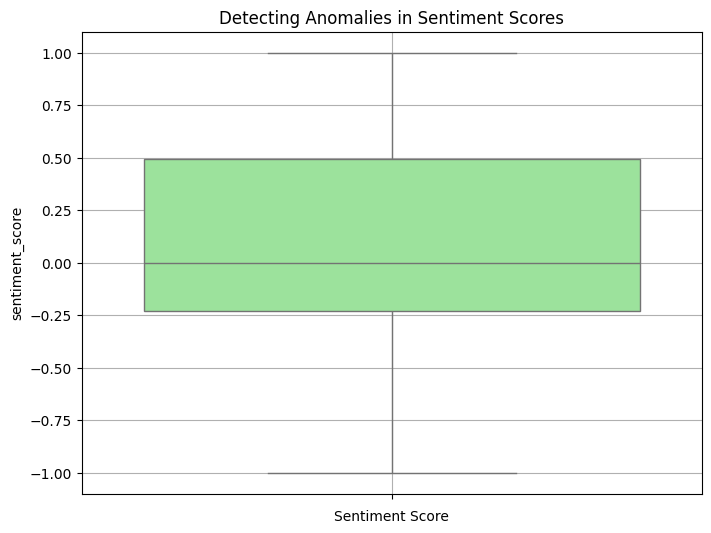

In [41]:
# Detect anomalies or outliers in sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data['sentiment_score'], color='lightgreen')
plt.title('Detecting Anomalies in Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

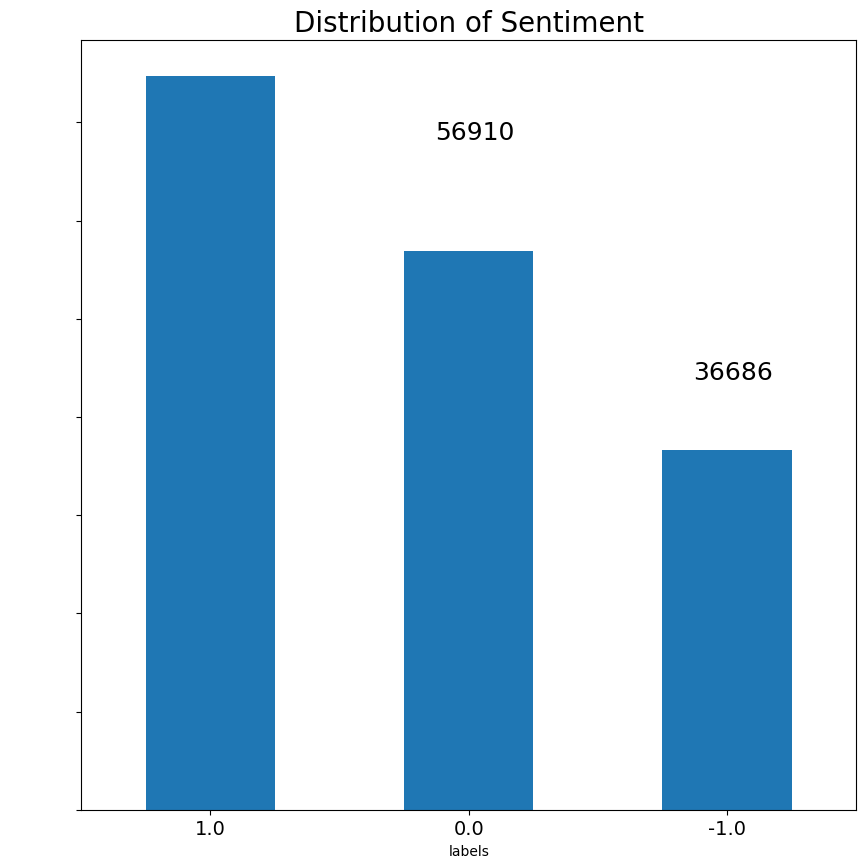

In [42]:
#Graph of Stopwords
fig , ax = plt.subplots(figsize = (10,10))
ax = data['labels'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['labels'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['labels'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['labels'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

# **Train & Test Split**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
#Finding X and y
X = data['messages1']
y = data['labels']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [46]:
##Vectorize text data
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# **Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model on the training data
log_reg_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
# Predict on the testing data
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

In [49]:
# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.8624398359973855


In [50]:
# Generate confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

Logistic Regression Confusion Matrix:
[[2803  435  519]
 [ 126 5380  240]
 [ 345  650 6331]]


Text(0.5, 1.0, 'Normalized Confusion Matrix')

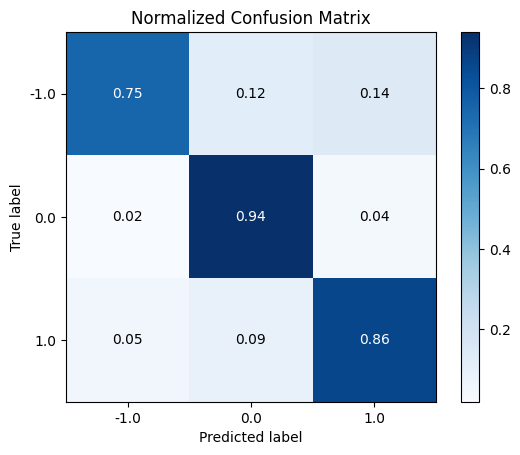

In [51]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log_reg, normalize=True)
plt.title("Normalized Confusion Matrix")


In [52]:
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Classification Report:")
print(report_log_reg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.75      0.80      3757
         0.0       0.83      0.94      0.88      5746
         1.0       0.89      0.86      0.88      7326

    accuracy                           0.86     16829
   macro avg       0.86      0.85      0.85     16829
weighted avg       0.86      0.86      0.86     16829



# **DecisionTree**

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2)


# Train the Decision Tree Classifier model on the training data
dt_model.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test_tfidf)

In [54]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classifier Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree Classifier Accuracy: 0.48844256937429437
Decision Tree Classifier Confusion Matrix:
[[   2 1130 2625]
 [   0 3134 2612]
 [   4 2238 5084]]


In [55]:
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier Classification Report:")
print(report_dt)

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

        -1.0       0.33      0.00      0.00      3757
         0.0       0.48      0.55      0.51      5746
         1.0       0.49      0.69      0.58      7326

    accuracy                           0.49     16829
   macro avg       0.44      0.41      0.36     16829
weighted avg       0.45      0.49      0.43     16829



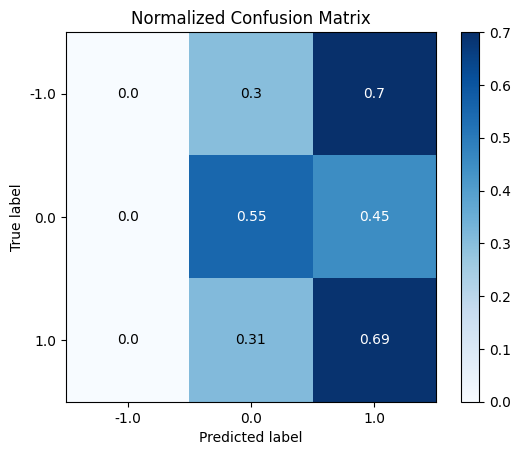

In [56]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()

# **KNeighbors**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the KNeighborsClassifier model on the training data
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [58]:
# Predict on the testing data
y_pred_knn = knn_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNeighborsClassifier Accuracy:", accuracy_knn)

KNeighborsClassifier Accuracy: 0.4183849307742587


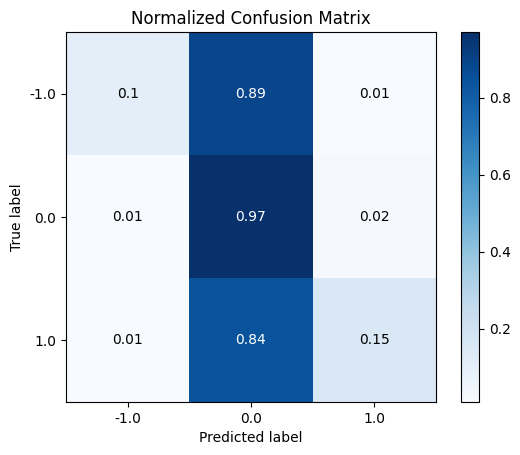

In [59]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()

# **AdaBoost**

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize AdaBoostClassifier model
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Train the AdaBoostClassifier model on the training data
ada_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier()

In [61]:
y_pred_ada = ada_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoostClassifier Accuracy:", accuracy_ada)

AdaBoostClassifier Accuracy: 0.687206607641571


In [62]:
# Generate confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("AdaBoostClassifier Confusion Matrix:")
print(conf_matrix_ada)

# Generate classification report
report_ada = classification_report(y_test, y_pred_ada)
print("AdaBoostClassifier Classification Report:")
print(report_ada)

AdaBoostClassifier Confusion Matrix:
[[1481 1813  463]
 [  47 5572  127]
 [ 286 2528 4512]]
AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.39      0.53      3757
         0.0       0.56      0.97      0.71      5746
         1.0       0.88      0.62      0.73      7326

    accuracy                           0.69     16829
   macro avg       0.75      0.66      0.66     16829
weighted avg       0.76      0.69      0.68     16829



# **Testing**

In [ ]:
def predict_sentiment(user_input, model, vectorizer):
    cleaned_input = user_input
    input_tfidf = vectorizer.transform([cleaned_input])
    prediction = model.predict(input_tfidf)
    sentiment = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment

user_input = input("input your sentance:  ")
result = predict_sentiment(user_input, rf_model, tfidf_vectorizer)
print(f"input your sentance: {result}")


<center>
  <h1><b>The End</b></h1>
</center>